In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Overview

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

Null hypothesis:  There is no difference in network latency since switching providers.  latency_before = latency_after

Alternative hypothesis:  There is a difference. latency_before != latency_after

True positive:  There is a difference

True negative:  No difference

Type 1 error. Reject the null and accept there may be a difference even though the latency is the same.

Type 2 error. Accept the null hypothesis that latency_before=latency after when there is a difference in latency.

Is the website redesign any good?

Null hypothesis: The website redesign is not better than it was before. redesign <= before

Alternative hypothesis: The redesign is better.  redesign > before

True positive:  redesign not any better

True negative:  redesign is better

Type one error: conclude that there is sufficient evidence to show that the redesign is better than before while it actually isn't

Type two error: conclude the redesign is not better than before when it actually is

Is our television ad driving more sales?

Null hypothesis: the television ad is not having any affect on sales (or worse)

Alternative hypothesis: the ad is driving more sales (set up as a one tail)

True positive: The ad is driving more sales

True negative: The ad has no effect

Type one error:  Conclude that there is evidence to show the ad is driving more sales when it isn't

Type two error:  Conclude that there is evidence that the ad is having no effect on revenue (or lower effect) when it in fact is driving more sales

# Comparison of Means

1.a. Answer with the type of test you would use (assume normal distribution):
Is there a difference in grades of students on the second floor compared to grades of all students?

would set up a one sample two tailed t test to compare the grades of students on the second floor to all students

b.  Are adults who drink milk taller than adults who dont drink milk?

would set up a independent one tailed t test to compare the two populations the heights of the ones who do and those who don't drink milk

c. Is the the price of gas higher in texas or in new mexico?

I would set up a independent two tailed t test to compare the price of gas between the two states

d.  Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

I would set up a independent t test to compare the stress levels between the two


2.  Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
n1 = 40
μ1 = 90
σ1 = 15
office1 = np.random.normal(μ1, σ1, n1)
n2 = 50
μ2 = 100
σ2 = 20
office2 = np.random.normal(μ2, σ2, n2)


In [3]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [4]:
#test for equal variances 
#mini null: equal
#mini alt: unequal
#mini α < .05
stat, pval = stats.levene(office1, office2)
stat, pval# not enough evidence to reject null

(6.340563700573221, 0.01360981018624931)

In [5]:
#Null hypothesis: There is no significant difference in the time it takes to sell homes in the two offices i.e. μ1 == μ2
#Alternative:  There is a difference μ1 != μ2 I will set up a two tail since it may have an effect both ways
# choose an α = .05
t, p = stats.ttest_ind(office1, office2, equal_var=True)
t, p

#not enoug evidence to reject the null hypothesis so there seems no significant difference between the two

(-3.729122841828882, 0.00033948924567565457)

In [6]:
#or
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=True)
t_stat, pval #in this case we have enough to reject the null hypothesis

(-2.6252287036468456, 0.01020985244923939)

3.  Load the mpg dataset and use it to answer the following questions:
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [7]:
 #two tailed
from pydataset import data
mpg = data('mpg')
mpg = mpg.assign(harmonic_mean = 2/(1/mpg.cty + 1/mpg.hwy))

In [8]:
nineteen_ninety_nine_cars = mpg[mpg.year == 1999]
two_thousand_eight_cars = mpg[mpg.year == 2008]

In [9]:
nineteen_ninety_nine_cars.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,3.281197,1999.0,5.692308,17.017094,23.427350,19.682388
std,1.260058,0.0,1.545079,4.458589,6.084628,5.084329
min,1.600000,1999.0,4.000000,11.000000,15.000000,12.692308
25%,2.200000,1999.0,4.000000,14.000000,17.000000,15.354839
50%,3.000000,1999.0,6.000000,17.000000,25.000000,19.902439
75%,4.000000,1999.0,6.000000,19.000000,26.000000,21.955556
max,6.500000,1999.0,8.000000,35.000000,44.000000,38.987342


<Axes: >

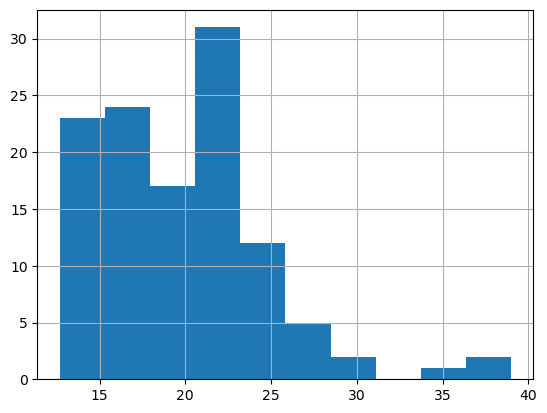

In [10]:
nineteen_ninety_nine_cars.harmonic_mean.hist()

In [11]:
two_thousand_eight_cars.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,117.000000,117.0,117.00000,117.000000,117.000000,117.000000
mean,3.662393,2008.0,6.08547,16.700855,23.452991,19.488663
std,1.300645,0.0,1.65869,4.056211,5.847923,4.748772
min,1.800000,2008.0,4.00000,9.000000,12.000000,10.285714
25%,2.500000,2008.0,4.00000,13.000000,18.000000,15.437500
50%,3.600000,2008.0,6.00000,17.000000,24.000000,19.512195
75%,4.700000,2008.0,8.00000,20.000000,28.000000,22.978723
max,7.000000,2008.0,8.00000,28.000000,37.000000,31.876923


<Axes: >

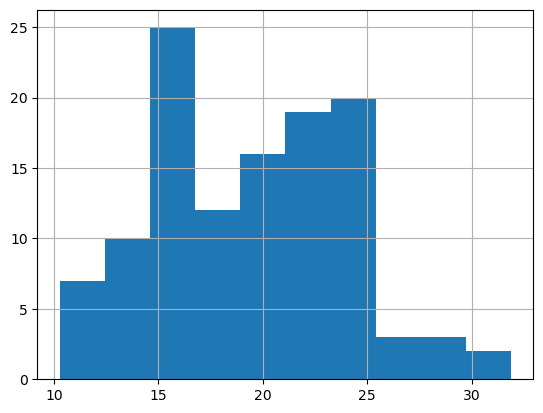

In [12]:
two_thousand_eight_cars.harmonic_mean.hist()

In [13]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(nineteen_ninety_nine_cars.harmonic_mean, two_thousand_eight_cars.harmonic_mean)

In [14]:
pval

0.8602339200830025

In [15]:
t, p = stats.ttest_ind(nineteen_ninety_nine_cars.harmonic_mean, two_thousand_eight_cars.harmonic_mean, equal_var=True)

In [16]:
t, p

(0.3011962975077886, 0.7635345888327115)

In [17]:
#We do not have the significance level so we fail to reject the null, there is no evidence that there is a difference

Are compact cars more fuel-efficient than the average car?

In [18]:
compact = mpg[mpg['class'] == 'compact']
compact.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000
mean,2.325532,2003.212766,4.595745,20.12766,28.297872,23.500417
std,0.452274,4.539374,0.900714,3.38550,3.781620,3.572665
min,1.800000,1999.000000,4.000000,15.00000,23.000000,18.750000
25%,2.000000,1999.000000,4.000000,18.00000,26.000000,21.272727
50%,2.200000,1999.000000,4.000000,20.00000,27.000000,22.978723
75%,2.800000,2008.000000,6.000000,21.00000,29.000000,24.360000
max,3.300000,2008.000000,6.000000,33.00000,44.000000,37.714286


In [19]:
#Null hypothesis:  There is no difference between the two  compact.harmonic_mean == non_compact.harmonic_mean
#Alternative Hypothesis:  There is a difference
#α < .025 one tailed

non_compact = mpg[mpg['class'] != 'compact']
non_compact.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,3.759893,2003.572193,6.213904,16.037433,22.219251,18.601569
std,1.274711,4.511500,1.588676,4.059198,5.780953,4.711123
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.285714
25%,2.500000,1999.000000,4.000000,13.000000,17.000000,14.915054
50%,3.800000,2008.000000,6.000000,15.000000,22.000000,17.837838
75%,4.700000,2008.000000,8.000000,18.000000,26.000000,21.590909
max,7.000000,2008.000000,8.000000,35.000000,44.000000,38.987342


In [20]:
stat, pval = stats.levene(compact.harmonic_mean, non_compact.harmonic_mean)
stat, pval #for equal variances

(7.730287593946991, 0.005875923121564377)

In [21]:
t, p = stats.ttest_ind(compact.harmonic_mean, non_compact.harmonic_mean, equal_var = False)
t, p

(7.841809963307849, 8.271751245887691e-12)

#There is sufficient evidence to reject the null hypothesis and suggest that there is a difference between compact cars and non-compact cara

Do manual cars get better gas mileage than automatic cars?

In [22]:
#Null hypothesis:   manual.harmonic_mean <= automatic.harmonic_mean
#Alternative Hypothesis:  manual.harmonic_mean > automatic.harmonic_mean
#α < .05 one tailed
manual = mpg[mpg.trans.str.contains('manual')]
manual.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.966234,2002.974026,5.246753,18.675325,25.779221,21.629229
std,1.187059,4.498462,1.479294,4.488118,5.961772,5.066126
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.285714
25%,2.000000,1999.000000,4.000000,15.000000,23.000000,18.461538
50%,2.500000,1999.000000,4.000000,18.000000,26.000000,21.590909
75%,3.500000,2008.000000,6.000000,21.000000,29.000000,24.360000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,38.987342


In [23]:
automatic = mpg[mpg.trans.str.contains('auto')]
automatic.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,3.719745,2003.757962,6.203822,15.968153,22.292994,18.583200
std,1.272210,4.506976,1.584131,3.848777,5.623054,4.519765
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.285714
25%,2.500000,1999.000000,4.000000,13.000000,17.000000,14.733333
50%,3.800000,2008.000000,6.000000,16.000000,22.000000,18.526316
75%,4.700000,2008.000000,8.000000,18.000000,26.000000,21.955556
max,6.500000,2008.000000,8.000000,29.000000,41.000000,33.971429


In [24]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(manual.harmonic_mean, automatic.harmonic_mean)
stat, pval #accept mini H0

(0.013901207169738269, 0.9062462281015493)

In [25]:
t, p = stats.ttest_ind(manual.harmonic_mean, automatic.harmonic_mean, equal_var=True)

In [26]:
t, p

(4.652577547151351, 5.510464610044005e-06)

In [27]:
#There is significant evidence to reject the null hypothesis and show that the data suggests a difference between the manuyal an automatic transmissions

# Correlation

1.  Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?

I would do a two tailed independent t test

Do guys and gals quit their jobs at the same rate?

I would also do a two tailed independent t test

Does the length of time of the lecture correlate with a students grade?

I would run the pearsons correlation coefficient and use the corresponding t values

2.  Use the telco_churn data.

In [28]:
from env import get_db_url

In [29]:
query = '''
SELECT customer_id, tenure, customers.phone_service, customers.internet_service_type_id, monthly_charges, total_charges, churn, churn_month 
FROM customers
JOIN customer_subscriptions USING (customer_id)
JOIN customer_churn USING (customer_id);
'''

telco = pd.read_sql(query, get_db_url('telco_churn'))
telco

,customer_id,tenure,phone_service,internet_service_type_id,monthly_charges,total_charges,churn,churn_month
0,0004-TLHLJ,4,Yes,2,73.90,280.85,Yes,2022-01-31
1,0011-IGKFF,13,Yes,2,98.00,1237.85,Yes,2022-01-31
2,0013-EXCHZ,3,Yes,2,83.90,267.4,Yes,2022-01-31
3,0022-TCJCI,45,Yes,1,62.70,2791.5,Yes,2022-01-31
4,0023-HGHWL,1,No,1,25.10,25.1,Yes,2022-01-31
...,...,...,...,...,...,...,...,...
1864,9961-JBNMK,21,Yes,2,96.80,2030.3,Yes,2022-01-31
1865,9965-YOKZB,9,Yes,2,83.85,790.15,Yes,2022-01-31
1866,9985-MWVIX,1,Yes,2,70.15,70.15,Yes,2022-01-31
1867,9986-BONCE,4,Yes,3,20.95,85.5,Yes,2022-01-31


In [30]:
telco.total_charges.dtype

dtype('O')

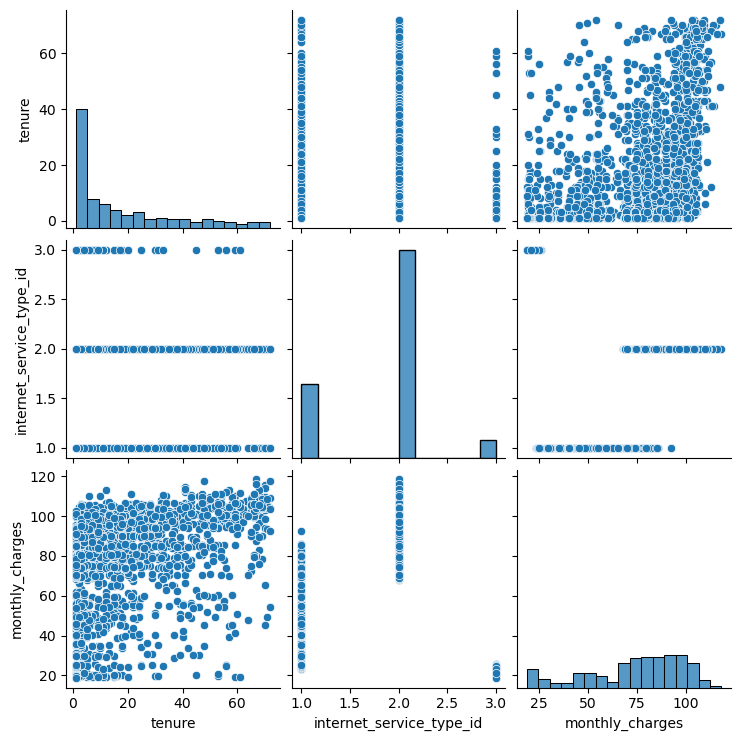

In [31]:
sns.pairplot(telco)

In [32]:
corr, p = stats.pearsonr(monthly_charges)

NameError: name 'monthly_charges' is not defined

In [ ]:
Does tenure correlate with monthly charges?

In [33]:
#Null hyp: There is no correlation between monthly charges and tenure
#Alt hyp: There is 
#α < 0.05
corr, p = stats.pearsonr(telco.monthly_charges, telco.tenure)
corr, p

(0.401285600132126, 3.0121978116585465e-73)

Our p value once again suggests that we can reject the null hypothesis and show there seems to be a correlation though not a particularly strong one

In [34]:
Total charges?

Object `charges` not found.


In [35]:
#Null hyp: There is no correlation between total charges and tenure
#Alt hyp: There is 
#α < 0.05
corr, p = stats.pearsonr(telco.total_charges.astype('float'), telco.tenure)
print(corr)
print(f'{p:.95f}')



0.9540174529269915
0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


The p value is extremely small so we can reject the null hypothesis, while the r value is very close to 1 suggesting a very strong correlation between total charges and tenure which makes sense the longer the tenure the larger the total charges.

In [36]:
What happens if you control for phone and internet service?

Object `service` not found.


In [ ]:
3.  Use the employees database.

In [61]:
query2 = '''
SELECT * 
FROM dept_emp
JOIN employees USING (emp_no)
JOIN salaries USING (emp_no)
JOIN titles USING(emp_no);
'''

employees = pd.read_sql(query2, get_db_url('employees'))
employees

KeyboardInterrupt: 

In [37]:
Is there a relationship between how long an employee has been with the company and their salary?

Object `salary` not found.


In [38]:
employees[]

SyntaxError: invalid syntax (3583372473.py, line 1)

In [39]:
plt.scatter(employees.hire_date, employees.salary)

NameError: name 'employees' is not defined

In [40]:
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Object `had` not found.


In [41]:
4.  Use the sleepstudy data.

SyntaxError: invalid syntax (3734011311.py, line 1)

In [ ]:
sleepstudy = data('sleepstudy')
sleepstudy

In [45]:
Is there a relationship between days and reaction time?

In [47]:
#Null hyp: There is no correlation between days and reaction time
#Alt hyp: There is a correlation
#α < .05

corr, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
corr, p

(0.5352302262650254, 9.89409632221453e-15)

There is enough evidence to rejet the Null Hypothesis and say there is a correlation between Days and Reaction time and with an r value of .53523 we cah say that we have a moderate correlation between the two.

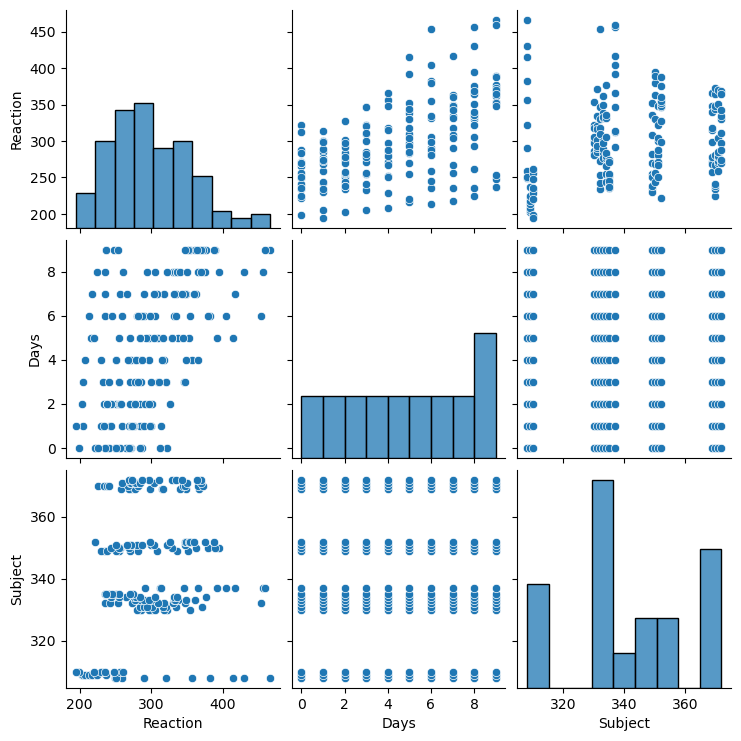

In [48]:
sns.pairplot(sleepstudy)

# Comparison of Means

1.  Answer with the type of stats test you would use (assume normal distribution):

Do students get better test grades if they have a rubber duck on their desk?

I would ues a chi squared test comparing grades by category by column and rubber duck (yes/no) for rows.

Does smoking affect when or not someone has lung cancer?

Again chi squared

Is gender independent of a person’s blood type?

Again chi squared

A farming company wants to know if a new fertilizer has improved crop yield or not

chi squared

Does the length of time of the lecture correlate with a students grade?

For this one I would run a pearson correlation

Do people with dogs live in apartments more than people with cats?

Chi Squared

2.  Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [88]:
computer = ['Uses Macbook', 'Doesn\'t use Macbook']
student = ['Codeup', 'Not Codeup']
observed = pd.DataFrame([[49, 20], [1, 30]], index=computer, columns=student)
observed

,Codeup,Not Codeup
Uses Macbook,49,20
Doesn't use Macbook,1,30


Null Hyp: the fact that the student is a codeup student or not is independent of whether they use a Macbook or not
Alt Hyp:  There is a relationship between whether or not one is a student of codeup and whether or not they use a macbook
\alpha < 0.05

In [95]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

With a p-value or 1.41x10^(-9) there is sufficient evidence to reject the null hypothesis and conclude that there is a relationship between whether or not a student is a codeup student and whether or not they use a macbook

In [49]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,harmonic_mean
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


3.  Choose another 2 categorical variables from the mpg dataset and perform a 
chi^2
contingency table test with them. Be sure to state your null and alternative hypotheses.

)Null hyp: t The model of car is independent from the harmonic_mean (average gas mileage
Alt hyp: There is a dependence relationship between the model of the car and its average gas mileage
    \alpha < 0.05

In [71]:
observed2 = pd.crosstab(mpg.model, mpg.harmonic_mean)
observed2


harmonic_mean,10.285714,12.320000,12.692308,13.037037,13.357143,13.714286,14.068966,14.344828,14.400000,14.733333,...,28.070175,28.800000,29.466667,29.508197,29.836066,30.295082,31.876923,33.971429,37.714286,38.987342
model,,,,,,,,,,,,,,,,,,,,,
4runner 4wd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a4 quattro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a6 quattro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
altima,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c1500 suburban 2wd,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
camry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
camry solara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
caravan 2wd,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)
chi2, p, degf, expected

(3338.1958650278293,
 3.8327318489116907e-10,
 2849,
 array([[0.12820513, 0.05128205, 0.25641026, ..., 0.02564103, 0.02564103,
         0.02564103],
        [0.14957265, 0.05982906, 0.2991453 , ..., 0.02991453, 0.02991453,
         0.02991453],
        [0.17094017, 0.06837607, 0.34188034, ..., 0.03418803, 0.03418803,
         0.03418803],
        ...,
        [0.14957265, 0.05982906, 0.2991453 , ..., 0.02991453, 0.02991453,
         0.02991453],
        [0.14957265, 0.05982906, 0.2991453 , ..., 0.02991453, 0.02991453,
         0.02991453],
        [0.14957265, 0.05982906, 0.2991453 , ..., 0.02991453, 0.02991453,
         0.02991453]]))

With a p value of 3.83 x 10^-10 we can reject the null hypothesis and conclude that there is a relationship between the model of car and the average gas mileage (by the harmonic mean)

Null Hyp:  city mileage and highway mileage are independant
Alt Hyp:  The two are dependant
\alpha < 0.05

In [69]:
observed3 = pd.crosstab(mpg.cty, mpg.hwy)
observed3


hwy,12,14,15,16,17,18,19,20,21,22,...,30,31,32,33,34,35,36,37,41,44
cty,,,,,,,,,,,,,,,,,,,,,
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,2,10,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,2,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,2,12,3,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,10,1,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,3,1,5,3,2,3,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,4,0,2,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
chi2, p, degf, expected = stats.chi2_contingency(observed3)
chi2, p, degf, expected

(2096.326782249858,
 1.0823437839115092e-187,
 520,
 array([[0.10683761, 0.04273504, 0.21367521, 0.14957265, 0.66239316,
         0.21367521, 0.27777778, 0.23504274, 0.04273504, 0.14957265,
         0.14957265, 0.27777778, 0.32051282, 0.68376068, 0.2991453 ,
         0.14957265, 0.47008547, 0.08547009, 0.14957265, 0.08547009,
         0.04273504, 0.02136752, 0.04273504, 0.04273504, 0.02136752,
         0.02136752, 0.04273504],
        [0.42735043, 0.17094017, 0.85470085, 0.5982906 , 2.64957265,
         0.85470085, 1.11111111, 0.94017094, 0.17094017, 0.5982906 ,
         0.5982906 , 1.11111111, 1.28205128, 2.73504274, 1.1965812 ,
         0.5982906 , 1.88034188, 0.34188034, 0.5982906 , 0.34188034,
         0.17094017, 0.08547009, 0.17094017, 0.17094017, 0.08547009,
         0.08547009, 0.17094017],
        [0.17094017, 0.06837607, 0.34188034, 0.23931624, 1.05982906,
         0.34188034, 0.44444444, 0.37606838, 0.06837607, 0.23931624,
         0.23931624, 0.44444444, 0.51282051, 1.09401

With a p value of 1.08 time 10^(-187) we can conclude that there is sufficent evidence to reject the null hypothesis and conclude that there is a relationship between city and highway mileage.

4.  Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [64]:
query3 = '''
SELECT gender, dept_name
FROM employees
JOIN dept_emp USING (emp_no)
JOIN departments USING (dept_no)
WHERE to_date > NOW()
AND dept_name in ('Sales', 'Marketing')
'''

gender = pd.read_sql(query3, get_db_url('employees'))
gender

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing
...,...,...
52538,F,Sales
52539,M,Sales
52540,M,Sales
52541,F,Sales


In [73]:
observed4 = pd.crosstab(gender.gender, gender.dept_name) 
observed4

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


Null Hyp:  The current employee's gender is independent of whether the employee works in sales or marketing 
Alt Hyp:  There is a dependence between gender and whether or not the employee works in sales or marketing
\alpha < 0.05

In [68]:
chi2, p, degf, expected = stats.chi2_contingency(observed4)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

There is not enough evidence to reject the Null hyp given a p-value of .569 so we don't see a relationship between an employee's gender and whether they work in sales or marketing

Is an employee's gender independent of whether or not they are or have been a manager?

In [75]:
query4 = '''
SELECT gender, title, emp_no
FROM employees
JOIN titles USING (emp_no);
'''

managers = pd.read_sql(query4, get_db_url('employees'))
managers

,gender,title,emp_no
0,M,Senior Engineer,10001
1,F,Staff,10002
2,M,Senior Engineer,10003
3,M,Engineer,10004
4,M,Senior Engineer,10004
...,...,...,...
443303,M,Engineer,499997
443304,M,Senior Engineer,499997
443305,M,Senior Staff,499998
443306,M,Staff,499998


In [78]:
managers['is_manager'] = managers.title == 'Manager'
managers

,gender,title,emp_no,is_manager
0,M,Senior Engineer,10001,False
1,F,Staff,10002,False
2,M,Senior Engineer,10003,False
3,M,Engineer,10004,False
4,M,Senior Engineer,10004,False
...,...,...,...,...
443303,M,Engineer,499997,False
443304,M,Senior Engineer,499997,False
443305,M,Senior Staff,499998,False
443306,M,Staff,499998,False


In [80]:
observed5 = pd.crosstab(managers.gender, managers.is_manager)

In [82]:
observed5

is_manager,False,True
gender,,
F,177211,13
M,266073,11


Null hyp: The fact that the employee's status as a manager is independent of their sex
Alt hyp:  The employee's status as a manager is dependent on their sex
\alpha < 0.05

In [84]:
chi2, p, degf, expected = stats.chi2_contingency(observed5)
chi2, p, degf, expected

(1.4658352730039057,
 0.22600394509880642,
 1,
 array([[1.77214405e+05, 9.59462947e+00],
        [2.66069595e+05, 1.44053705e+01]]))

With a p-value of .22600394 there is not enough evidence to reject the null hypothesis and thus we conclude that there is no relationship between a managers gender and sex.